In [1]:
%matplotlib inline             
import matplotlib.pyplot as plt
import numpy as np

# Ordinary differential equations training

## 1. First training, with  a simple equation


We want to solve the very simple equation :$\frac{dx}{dt}=-kx$, with $x(t=0)=x_0$ as an initial boundary condition.
1) Solve the equation anlaytically and write the solution below x(t)=

$x(t) = x_0 e^{-kt} $

To what physical process it would correspond ? What is the dimension of $1/k$ assuming that $t$ is a time ?

It could correspond to a dragged trajectory in one dimension or the rate of nuclear decay

In the following we call $f(x,t)$ the derivative $\frac{dx}{dt}=-kx $, so that the system we want to solve can be simply written $\frac{dx}{dt}=f(x,t)$

#### 1.1 Euler solver

Build a function called $deriv(x,t)$ that returns f(x,t). k will be declared as a global variables, defined outside the function $deriv(x,t)$. You can use the following template. Print f for x0=1, t=10., k=1.

In [2]:
def deriv(x,t): #Definition of the function required
    global k
      
    return -k*x

k=1
print(deriv(1,10))

-1


Build a simple Euler solver: define dt, and write an iterative procedure that at each time step 
* 1) compute f(x,t)
* 2) increment x according to the Euler scheme : x(t+dt)=x(t)+dt*f(x,t)
* 3) keep in memory the new value of x(t)
* 3) time=time+dt

Of course, before that you must initialize time=0 and x(t=0)=1 


plot the result for dt=0.1 and for time going from 0 to t=5

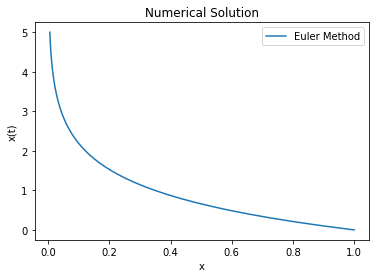

In [3]:
def euler(function,dt,interval_t,x_0):#Here we define the euler solver with the inputs: function(the derivative of the function df/dx that we use for the Euler Method), 
                                      #the time step dt, the interval in which we want to solve the equation and the initial values
    dt_points = np.arange(interval_t[0], interval_t[1]+dt,dt)#The interval divided by time pieces of length dt.
    x_t = [x_0] #The list in which we will store the calculated values
    for x in dt_points:
        x_t += [x_t[-1] + dt*function(x_t[-1],0)]#Here is where we implemented the Euler Solver algorithm
    del x_t[-1]
    return x_t

dt_points = np.arange(0,5.1,0.1)
euler_values = euler(deriv,0.1,[0,5],1)#Here we test the solver
analytical_values = np.array([np.exp(-t) for t in dt_points])#We prepare an array for the analytical solution
plt.plot(euler_values,dt_points, label="Euler Method")
plt.xlabel("x")
plt.ylabel("x(t)")
plt.title("Numerical Solution")
plt.legend()
plt.show()


Plot the difference between the numeric solution and the anlytical solution. Do you have comments ?

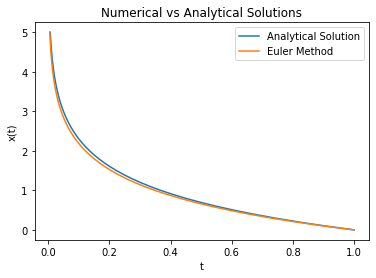

In [4]:
plt.plot(analytical_values,dt_points, label="Analytical Solution")#Here we plot the analytical values with the values calculated by our solver and compare the plots
plt.plot(euler_values,dt_points, label="Euler Method")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Numerical vs Analytical Solutions")
plt.legend()
plt.show()
#Here we can observe that the solver by the Euler Method is very accurate both lines are almost overlapping, exept for that part where the 
#solution "curves" between 0.0 and 0.4 but in the straight parts of the solution the solver works good.

Redo the same exercice for dt=0.2, 0.4, 0.8, 1.6,Comment ?

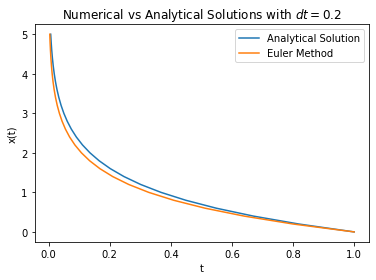

In [5]:
dt_values = 0.2
dt_points = np.arange(0,5+dt_values,dt_values)
euler_values = euler(deriv,dt_values,[0,5],1)
analytical_values = np.array([np.exp(-t) for t in dt_points])
plt.plot(analytical_values,dt_points, label="Analytical Solution")
plt.plot(euler_values,dt_points, label="Euler Method")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Numerical vs Analytical Solutions with $dt=0.2$")
plt.legend()
plt.show()
#Here we can observe that with a larger time lapse the solution becomes inaccurate above the "curved" part we mentioned before


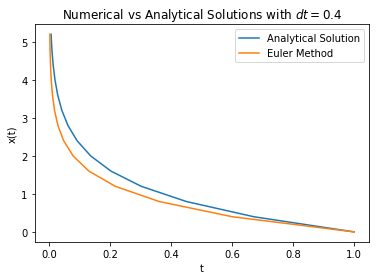

In [6]:
dt_values = 0.4
dt_points = np.arange(0,5+dt_values,dt_values)
euler_values = euler(deriv,dt_values,[0,5],1)
analytical_values = np.array([np.exp(-t) for t in dt_points])
plt.plot(analytical_values,dt_points, label="Analytical Solution")
plt.plot(euler_values,dt_points, label="Euler Method")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Numerical vs Analytical Solutions with $dt=0.4$")
plt.legend()
plt.show()
#Here the solution gets too inaccurate. Again the most serius problem is in the same region we mentioned above.
#However the solution is accurate on the extremes, and in the time lapse 0.1 it begins to get inaccurate

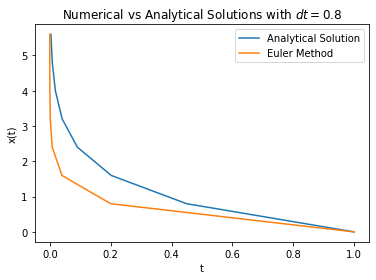

In [7]:
dt_values = 0.8
dt_points = np.arange(0,5+dt_values,dt_values)
euler_values = euler(deriv,dt_values,[0,5],1)
analytical_values = np.array([np.exp(-t) for t in dt_points])
plt.plot(analytical_values,dt_points, label="Analytical Solution")
plt.plot(euler_values,dt_points, label="Euler Method")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Numerical vs Analytical Solutions with $dt=0.8$")
plt.legend()
plt.show()
#The inaccuracy in the problematic part now is extremely obvious. Luckily, near the "straight" parts (0.0 and 0.8) points the numerical solution
#It is still quite approximated.

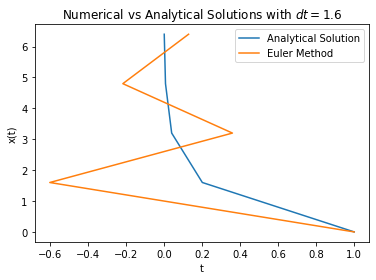

In [51]:
dt_values = 1.6
dt_points = np.arange(0,5+dt_values,dt_values)
euler_values = euler(deriv,dt_values,[0,5],1)
analytical_values = np.array([np.exp(-t) for t in dt_points])
plt.plot(analytical_values,dt_points, label="Analytical Solution")
plt.plot(euler_values,dt_points, label="Euler Method")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Numerical vs Analytical Solutions with $dt=1.6$")
plt.legend()
plt.show()
#Here we have lost all the accuracy at the beginning of the function, it barely crosses the analytical solution in 3 points in the range [0.0,1.0] but it seems that near the point 1.0 the numerical solution gets a bit more close to the analytical one.

#### 1.2 Second order solver


Redo the same as before, but with the modifed Euler explicit scheme (see lecture)

In [9]:
def euler_modifed(function,dt,interval_t,x_0):#Here we define the function for the Euler Modified with the same variables as the Simple Euler solver.
    dt_points = np.arange(interval_t[0], interval_t[1]+dt,dt)
    x_t = [x_0]
    for x in dt_points:
        x_t += [x_t[-1] + dt*function(x_t[-1] + dt/2 * function(x_t[-1],0),0)]#Once we understood the Euler method we can improve the algorithm to let it compute more efficiently
                                                                              #In this sense defined the whole Euler Modified Algorithm in one line as can be seen here.
    del x_t[-1]
    return x_t





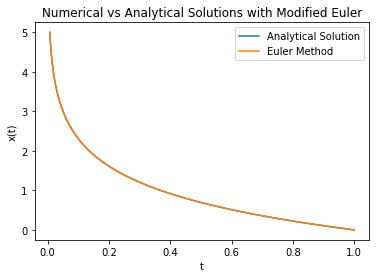

In [10]:
dt_values = 0.1
dt_points = np.arange(0,5+dt_values,dt_values)
euler_values = euler_modifed(deriv,dt_values,[0,5],1)
analytical_values = np.array([np.exp(-t) for t in dt_points])
plt.plot(analytical_values,dt_points, label="Analytical Solution")
plt.plot(euler_values,dt_points, label="Euler Method")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Numerical vs Analytical Solutions with Modified Euler")
plt.legend()
plt.show()

#Fits perfectly!!!!! Both lines are completely overlapping, at least as our computers let us know. Both lines are indistinguishable. 

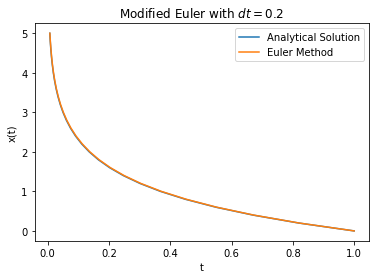

In [11]:
dt_values = 0.2
dt_points = np.arange(0,5+dt_values,dt_values)
euler_values = euler_modifed(deriv,dt_values,[0,5],1)
analytical_values = np.array([np.exp(-t) for t in dt_points])
plt.plot(analytical_values,dt_points, label="Analytical Solution")
plt.plot(euler_values,dt_points, label="Euler Method")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Modified Euler with $dt=0.2$")
plt.legend()
plt.show()
#Despite we have increased the time lapse the solutions are almost indistinguishable.

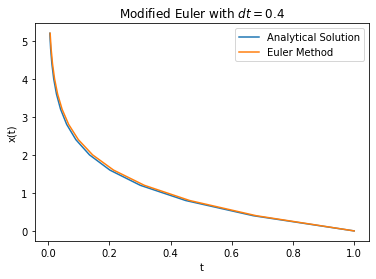

In [12]:
dt_values = 0.4
dt_points = np.arange(0,5+dt_values,dt_values)
euler_values = euler_modifed(deriv,dt_values,[0,5],1)
analytical_values = np.array([np.exp(-t) for t in dt_points])
plt.plot(analytical_values,dt_points, label="Analytical Solution")
plt.plot(euler_values,dt_points, label="Euler Method")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Modified Euler with $dt=0.4$")
plt.legend()
plt.show()
#Again we begin to see problems in the "curved" part of the solution, that is between the time [0.0,0.2] but the inaccuracies are scarce,
#so our solution is still a good approximation.

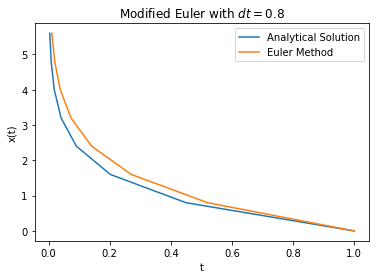

In [13]:
dt_values = 0.8
dt_points = np.arange(0,5+dt_values,dt_values)
euler_values = euler_modifed(deriv,dt_values,[0,5],1)
analytical_values = np.array([np.exp(-t) for t in dt_points])
plt.plot(analytical_values,dt_points, label="Analytical Solution")
plt.plot(euler_values,dt_points, label="Euler Method")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Modified Euler with $dt=0.8$")
plt.legend()
plt.show()
#Here the solution is not that accurate in the "curved" part we mentioned above, but it at least follow the shape of the analytical solution
#that is, it looks like our analytical solution with a displacement.

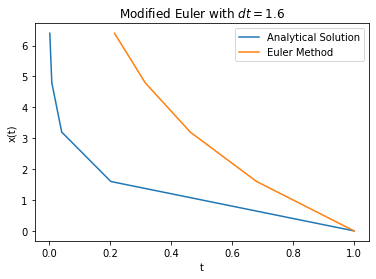

In [14]:
dt_values = 1.6
dt_points = np.arange(0,5+dt_values,dt_values)
euler_values = euler_modifed(deriv,dt_values,[0,5],1)
analytical_values = np.array([np.exp(-t) for t in dt_points])
plt.plot(analytical_values,dt_points, label="Analytical Solution")
plt.plot(euler_values,dt_points, label="Euler Method")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Modified Euler with $dt=1.6$")
plt.legend()
plt.show()

#Even this one is not as messy as before. It follows the shape of the analytical solution, so if we don't need 
#accuracy and just to have an approximate idea of how goes the analytical solution, this time step helps.

## 2 Energy conservative system: orbital motion in 2D (2nd order solver)

We now solve an energy conservative system, with no, or complex solution. We consider the gravity equation of a body with mass body with mass M. The equation of motion is :

$\frac{dX^2 }{dt^2}=-\frac{GM}{r^2}\times\frac{X}{r}$


$\frac{dY^2 }{dt^2}=-\frac{GM}{r^2}\times\frac{Y}{r}$




Where G is the universal gravity constant and $r=(X^2+Y^2)^{1/2}$. This is a coupled system of 2 second order equations. Rewrite it as a system of 4 first order equations, using $Vx$ and $Vy$ : the X and Y component of velocity in cartesian coordinates.

The system of 4 first order equations is : 

$\frac{dV_x}{dt}=-\frac{GM}{r^2}\times\frac{X}{r}$


$\frac{dX}{dt}=V_x$

$\frac{dV_y}{dt}=-\frac{GM}{r^2}\times\frac{Y}{r}$


$\frac{dY}{dt}=V_y$


We will take the Earth-Moon system (check mass values on internet, work in METRIC SYSTEM UNITS !!) We will consider that the initial position of the moon at time=0 is X=384000km , Y=0, and that its velocity is Vx=0, $Vy=+a \omega $, where $a$ is the inital Earth-Moon distance (called semi-major axis), and $\omega=(GM/a^3)^{1/2}$ is the orbital angular velocity. The orbital period of the Moon, in, in theory should be $T=2\pi/\omega$

Write a function called $gravderiv(X,Y,Vx,Vy,t)$ that returns the derivative of vector (X,Y,Vx,Vy)


In [15]:
#Earth-Moon M=6.05×10^24 kg, a= 385776x10^3m, G=6.67408 × 10-11 m^3 kg-1 s-2
M=6.05e24
a= 385776e3
G=6.67408e-11
y_0=0
x_0 = 384000e3
v_x_0 = 0
w = np.sqrt(G*M/a**3)
V_y_0 =a*w
T = np.pi * 2/w #Here we defined all the constants that we are going to use in the consecutive problems

def gravderiv(X,Y,V_x,V_y,t):#Here we define the required function
    r = np.sqrt(X**2 + Y**2)
    deriv_X = V_x
    deriv_Y = V_y
    deriv_V_x = -(G*M/r**2) * (X/r)
    deriv_V_y = -(G*M/r**2) * (Y/r)
    return np.array([deriv_X,deriv_Y,deriv_V_x,deriv_V_y])

def greavderiv_chose(option, value):  #This were easier to work on our solution to get plots, but at the end we decided to change the algorithm and improve it
                                      #but we left this just to let you know how we reached to our new algorithm.
    if option == 'deriv_X':
        return value[0]
    elif option == 'deriv_Y':
        return value[0]
    elif option == 'deriv_V_x':
        r = np.sqrt(value[0]**2 + value[1]**2)
        return -(G*M*value[0]/r**3)
    elif option == 'deriv_V_y':
        r = np.sqrt(value[0]**2 + value[1]**2)
        return -(G*M*value[1]/r**3)
    

In [16]:
#Write a program that integrate the Moon motion, from time=0 to time=100T, using the Modified Euler method.
def euler_modifed_moon(dt,interval_t,X,Y,V_x,V_y):
    dt_points = np.arange(interval_t[0], interval_t[1]+dt,dt)#Here we sum a dt at the end of the interval to mantain the correct dimensions for the plots
    x_t = [X]#Here we define our lists
    y_t = [Y]
    Vy_t = [V_y]
    Vx_t = [V_x]
    for i in range(len(dt_points)-1):
        values = gravderiv(x_t[-1],y_t[-1],Vx_t[-1],Vy_t[-1],0)
        values_k = gravderiv(x_t[-1]+dt/2 * values[0],y_t[-1]+dt/2 * values[1],Vx_t[-1] + dt/2*values[2],Vy_t[-1] + dt/2 * values[3],0)#This is our auxiliar k that is required in the Modified Euler method.
        x_t+=[x_t[-1] + dt*values_k[0]]
        y_t+=[y_t[-1] + dt*values_k[1]]
        Vx_t+=[Vx_t[-1] + dt*values_k[2]]
        Vy_t+=[Vy_t[-1] + dt*values_k[3]]
        #******This was our old algorithm but we decided to change it because we observed this is a bit slow******
        #y_t += [y_t[-1] + dt*Vy_t[-1]] 
        #x_t += [x_t[-1] + dt*Vx_t[-1]]
        #Vx_t += [Vx_t[-1] + dt*greavderiv_chose("deriv_V_x",[
        #    x_t[-1] + dt/2 * greavderiv_chose("deriv_V_x",[x_t[-1],y_t[-1]]),
        #    y_t[-1] + dt/2 * greavderiv_chose("deriv_V_y",[x_t[-1],y_t[-1]])
        #    ])]
        #Vy_t += [Vy_t[-1] + dt*greavderiv_chose("deriv_V_y",[
        #    x_t[-1] + dt/2 * greavderiv_chose("deriv_V_x",[x_t[-1],y_t[-1]]),
        #    y_t[-1] + dt/2 * greavderiv_chose("deriv_V_y",[x_t[-1],y_t[-1]])
        #    ])]
        
    return {'x_t':x_t, 'y_t':y_t, 'Vx_t':Vx_t, 'Vy_t':Vy_t, 't_points':dt_points}


moon_result_values = euler_modifed_moon(0.01*T,[0,100*T],x_0,y_0,v_x_0,V_y_0)





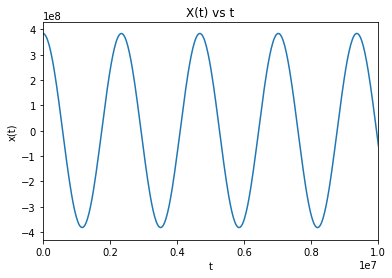

In [17]:
#Use first a time-step dt= 0.01T . Plot the Moon motion X(t), Y(t), Vx(t), Vy(t)
plt.title(r'X(t) vs t')
plt.plot(moon_result_values['t_points'],moon_result_values['x_t'])
plt.xlabel("t")
plt.ylabel("x(t)")
plt.xlim(0, 1e7)#We introduce this limit to see the oscillations of the X(t).
plt.show()


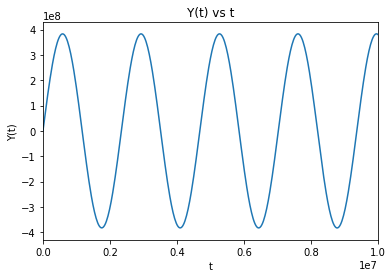

In [18]:
plt.title(r'Y(t) vs t')
plt.plot(moon_result_values['t_points'],moon_result_values['y_t'])
plt.xlabel("t")
plt.ylabel("Y(t)")
plt.xlim(0, 1e7)#We introduce the same limit to observe the oscilations in the Y(t).
plt.show()

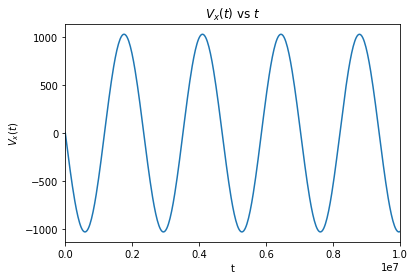

In [19]:
plt.title(r'$V_x(t)$ vs $t$')
plt.plot(moon_result_values['t_points'],moon_result_values['Vx_t'])
plt.xlabel("t")
plt.ylabel("$V_x(t)$")
plt.xlim(0, 1e7)#Again the limit to visualize the oscillations
plt.show()

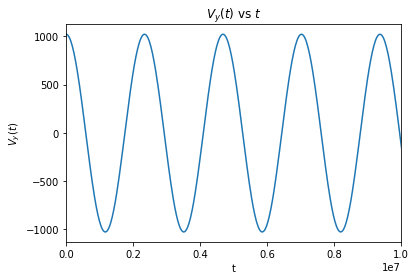

In [20]:
plt.title(r'$V_y(t)$ vs $t$')
plt.plot(moon_result_values['t_points'],moon_result_values['Vy_t'])
plt.xlabel("t")
plt.ylabel("$V_y(t)$")
plt.xlim(0, 1e7)#Again the limit
plt.show()

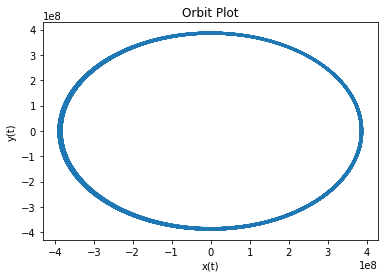

In [21]:
## Just for the fun of it...


plt.title(r'Orbit Plot')
plt.plot(moon_result_values['x_t'],moon_result_values['y_t'])
plt.xlabel("x(t)")
plt.ylabel("y(t)")


plt.show()

Compute at every time-step the total energy $E_T$ (Kinetic + Potential). Plot energy variations $\Delta_E(t)=\frac{E_T(t)-E_T(t=0)}{E_T(t=0)}$. Is energy really constant ? What happens in your opinion? 

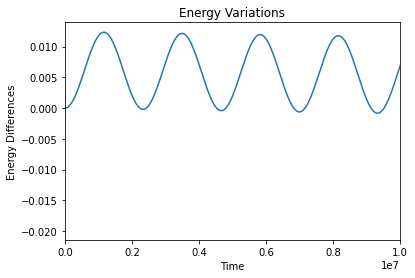

In [22]:
#Energy 
T_energy = 0.5 * M * (np.power(moon_result_values['Vx_t'],2) + np.power(moon_result_values['Vy_t'],2))#Kinetic Energy
V_energy = -G*M/np.sqrt(np.power(moon_result_values['x_t'],2)+np.power(moon_result_values['y_t'],2))#Potential Energy
energy = T_energy + V_energy#Total Energy
energy_variations = (energy - energy[0])/energy[0]#Differences of the Energy

plt.plot(moon_result_values['t_points'], energy_variations)
plt.title("Energy Variations")
plt.xlabel("Time")
plt.ylabel("Energy Differences")
plt.xlim(0, 1e7)
plt.show()
#The energy is constant and therefore conserved in this system, that's what we know from the theory of gravitation, but here we're 
#making a numerical simulation so we must recognize there are errors in the calculation and these errors oscillate which coincides with the plot below. 

Redo the same for dt=0.1T and dt=0.5T: Plot the orbit in (X,Y) frame and $E_T$ as a function of time.

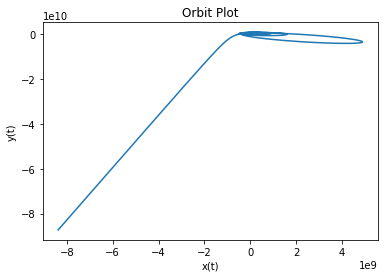

In [23]:
#0.1
moon_result_values = euler_modifed_moon(0.1*T,[0,100*T],x_0,y_0,v_x_0,V_y_0)
plt.title(r'Orbit Plot')
plt.plot(moon_result_values['x_t'],moon_result_values['y_t'])
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.show()
#Here we can observe  that our solution diverges a lot at the begining and lates to stabilize.

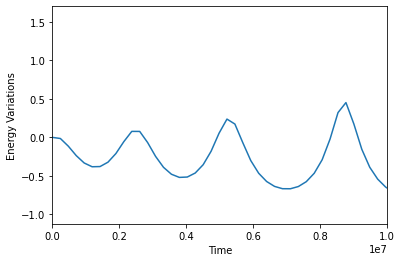

In [24]:
#Energy 
T_energy = 0.5 * M * (np.power(moon_result_values['Vx_t'],2) + np.power(moon_result_values['Vy_t'],2))
V_energy = -G*M/np.sqrt(np.power(moon_result_values['x_t'],2)+np.power(moon_result_values['y_t'],2))
energy = T_energy + V_energy

energy_variations = (energy - energy[0])/energy[0]

plt.plot(moon_result_values['t_points'], energy_variations)
plt.xlim(0, 1e7)
plt.xlabel("Time")
plt.ylabel("Energy Variations")
plt.show()
#Again we observe a change with respect to the last time lapse, here we can observe that the error oscillates in a non-uniform way

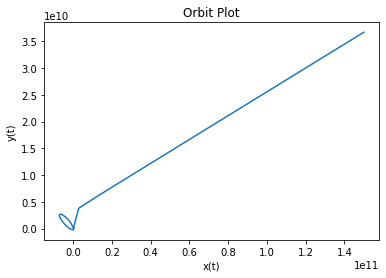

In [25]:
#0.5
moon_result_values = euler_modifed_moon(0.5*T,[0,100*T],x_0,y_0,v_x_0,V_y_0)
plt.title(r'Orbit Plot')
plt.plot(moon_result_values['x_t'],moon_result_values['y_t'])
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.show()
#Again we can see that the solution diverges at some point and lates to stabilize in a region.

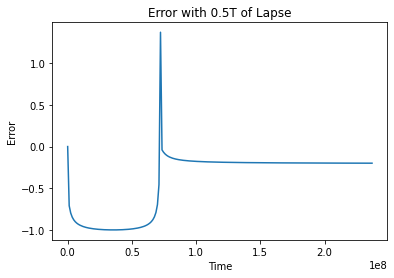

In [26]:
#Energy 
T_energy = 0.5 * M * (np.power(moon_result_values['Vx_t'],2) + np.power(moon_result_values['Vy_t'],2))
V_energy = -G*M/np.sqrt(np.power(moon_result_values['x_t'],2)+np.power(moon_result_values['y_t'],2))
energy = T_energy + V_energy

energy_variations = (energy - energy[0])/energy[0]

plt.plot(moon_result_values['t_points'], energy_variations)
plt.title("Error with 0.5T of Lapse")
plt.xlabel("Time")
plt.ylabel("Error")
plt.show()
#Here the Error in the energy is totally unpredictable at some point in the beginning it soars to consequently stabilize a bit around the zero.

In [27]:
#Conclusion : What time-step should you use ?  0.01 The error is huge for other cases and difficult to predict.

How to control the quality of your solution  in your opinion?

In [28]:
#At first glance it seems that it would be useful to make trials, but at the end of the day if we make the time steps small 
#we know that it is likely to choose the correct step for a stable solution.

Now, let's considere a more complicated orbit. Start the same integration, but now the initial velocity has a small X component initially à t=0: $Vx=e V_y$, $Vy=+a \omega $, with $abs(e) < 1$. Choose e=0.01 and then e=0.1.

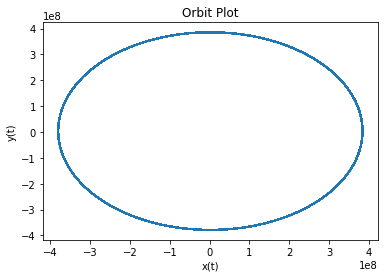

In [29]:
#Orbit for e=0.01
pert_e = 0.01
moon_result_values = euler_modifed_moon(0.001*T,[0,100*T],x_0,y_0,V_y_0*pert_e,V_y_0)
plt.title(r'Orbit Plot')
plt.plot(moon_result_values['x_t'],moon_result_values['y_t'])
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.show()
#What we observe here is that the orbit doesn't change a lot compared with the one that didn't have the perturbation

Display energy variations for e=0.01 and then e=0.1. What do you see ?

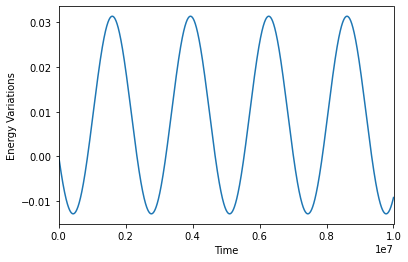

In [30]:
#Energy Variations for e=0.01 
T_energy = 0.5 * M * (np.power(moon_result_values['Vx_t'],2) + np.power(moon_result_values['Vy_t'],2))
V_energy = -G*M/np.sqrt(np.power(moon_result_values['x_t'],2)+np.power(moon_result_values['y_t'],2))
energy = T_energy + V_energy
energy_variations = (energy - energy[0])/energy[0]
plt.plot(moon_result_values['t_points'], energy_variations)
plt.xlim(0, 1e7)
plt.xlabel("Time")
plt.ylabel("Energy Variations")
plt.show()
#Here the energy variations are very similar compared with the case in which e=0 in shape, but the error is bigger. The difference between the 
#maximum and the minimum is 0.04.

Text(0, 0.5, 'y(t)')

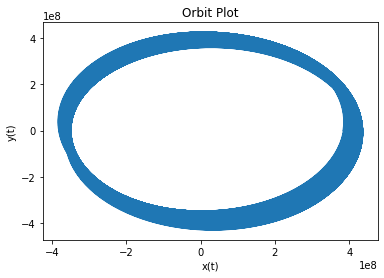

In [31]:
#Orbit for e=0.1
pert_e = 0.1
moon_result_values = euler_modifed_moon(0.01*T,[0,100*T],x_0,y_0,V_y_0*pert_e,V_y_0)
plt.title(r'Orbit Plot')
plt.plot(moon_result_values['x_t'],moon_result_values['y_t'])
plt.xlabel("x(t)")
plt.ylabel("y(t)")
#The orbit is  similar to the last one, but it seems that it is displacing in the x(t),y(t) plane downwards 

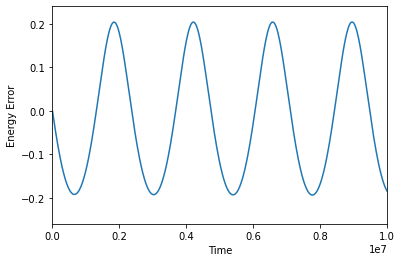

In [32]:
#Energy error for e=0.1
T_energy = 0.5 * M * (np.power(moon_result_values['Vx_t'],2) + np.power(moon_result_values['Vy_t'],2))
V_energy = -G*M/np.sqrt(np.power(moon_result_values['x_t'],2)+np.power(moon_result_values['y_t'],2))
energy = T_energy + V_energy

energy_variations = (energy - energy[0])/energy[0]

plt.plot(moon_result_values['t_points'], energy_variations)
plt.xlabel("Time")
plt.ylabel("Energy Error")
plt.xlim(0, 1e7)
plt.show()
#Here the value of the error is equivalent to the one in which e=0.01 because if we calculate the difference between the maximum error
#and the minimum error, the result is the same (4), but the plot of the error is displaced downwards a unity of 1.

## 3 Energy conservative system 2 : going to 4th order

Reuse the function that computes the derive in case of planetary motion (exercice 2). Now change the solver and code a Runge Kutta 4 scheme, that is 4th order. Put your code below. 

In [33]:
def runge_kutta_4_moon(dt,interval_t,X,Y,V_x,V_y):#Here we define the Runge Kutta program of 4th order
    dt_points = np.arange(interval_t[0], interval_t[1]+dt,dt)
    x_t = [X]
    y_t = [Y]
    Vy_t = [V_y]
    Vx_t = [V_x]
    for i in range(len(dt_points)-1):
      #k values for the Runge Kutta Algorithm
      values_k_1 = dt*gravderiv(x_t[-1],y_t[-1],Vx_t[-1],Vy_t[-1],0)
      values_k_2 = dt*gravderiv(x_t[-1]+values_k_1[0]/2,y_t[-1]+values_k_1[1]/2,Vx_t[-1]+values_k_1[2]/2,Vy_t[-1]+values_k_1[3]/2,0)
      values_k_3 = dt*gravderiv(x_t[-1]+values_k_2[0]/2,y_t[-1]+values_k_2[1]/2,Vx_t[-1]+values_k_2[2]/2,Vy_t[-1]+values_k_2[3]/2,0)
      values_k_4 = dt*gravderiv(x_t[-1]+values_k_3[0],y_t[-1]+values_k_3[1],Vx_t[-1]+values_k_3[2],Vy_t[-1]+values_k_3[3],0)

      x_t += [x_t[-1] + 1/6*(values_k_1[0]+2*values_k_2[0]+2*values_k_3[0]+values_k_4[0])]
      y_t += [y_t[-1] + 1/6*(values_k_1[1]+2*values_k_2[1]+2*values_k_3[1]+values_k_4[1])]
      Vx_t += [Vx_t[-1] + 1/6*(values_k_1[2]+2*values_k_2[2]+2*values_k_3[2]+values_k_4[2])]
      Vy_t += [Vy_t[-1] + 1/6*(values_k_1[3]+2*values_k_2[3]+2*values_k_3[3]+values_k_4[3])]
        
    return {'x_t':x_t, 'y_t':y_t, 'Vx_t':Vx_t, 'Vy_t':Vy_t, 't_points':dt_points}
  
moon_result_values_rk4 = runge_kutta_4_moon(0.001*T,[0,100*T],x_0,y_0,v_x_0,V_y_0)


Using the same time-steps as before, plot the motion of the moon, and now compute and display energy variations as a function of time.

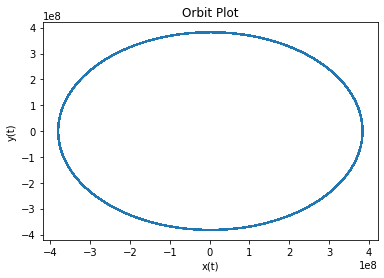

In [34]:
plt.title(r'Orbit Plot')
plt.plot(moon_result_values_rk4['x_t'],moon_result_values_rk4['y_t'])
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.show()
#Here we can observe that the orbit is more localized as it follows a thinner line compared with the Modified Euler method.

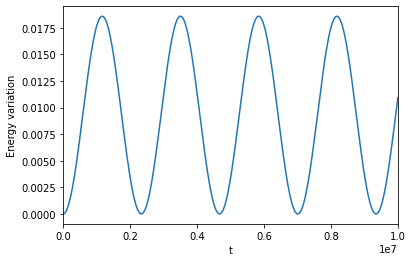

In [35]:
#Energy Error
T_energy = 0.5 * M * (np.power(moon_result_values_rk4['Vx_t'],2) + np.power(moon_result_values_rk4['Vy_t'],2))
V_energy = -G*M/np.sqrt(np.power(moon_result_values_rk4['x_t'],2)+np.power(moon_result_values_rk4['y_t'],2))
energy = T_energy + V_energy
energy_variations = (energy - energy[0])/energy[0]
plt.plot(moon_result_values_rk4['t_points'], energy_variations)
plt.xlabel("t")
plt.ylabel("Energy variation")
plt.xlim(0, 1e7)
plt.show()
#We can observe that the error is similar to the one we got with the Modified Euler Method

It may be also interesting to plot the angular momentum of the Moon as a function of time. This should be also conserved. Is it the case ?

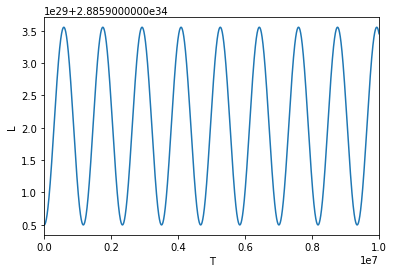

In [36]:
# Angular momentum is defined as L=mvr
moon_mass = 7.3459e22
v=np.sqrt(np.power(moon_result_values_rk4['Vx_t'],2) + np.power(moon_result_values_rk4['Vy_t'],2))
r=np.sqrt(np.power(moon_result_values_rk4['x_t'],2) + np.power(moon_result_values_rk4['y_t'],2))
L = moon_mass*v*r
plt.plot(moon_result_values_rk4['t_points'], L)
plt.xlabel("T")
plt.ylabel("L")
plt.xlim(0, 1e7)
plt.show()
#Again we know from the equations that the angular momentum is conserved but here we can deduce again that the oscillations come from the error in the numerical model.


## 4 : Interest of implicit solver ! Free-Fall in a viscous fluid

We consider the motion of a particle with mass m, radius r free-faling in a fluid. The particle is inserted at altitude Z with 0 velocity initially.  It suffers the weight force ($Fg=-mg$) plus a friction force, the "Stokes Force", so that :

$F_S =-6\pi \mu r v$

with $\mu$ is the fluid dynamical viscosity (in $Pa S$) , r is the particle radius, and v is its velocity (positive when directed upward, negative when directed downward, so that the Z axis is directed upward by convention)

We solve the system of equation 
$\frac{dZ}{dt}=?$ 
and 
$\frac{d V_Z }{dt}=?$

The system of 2 first order equations is : 

$\frac{dV_z}{dt}=-g+6\pi \mu rv/m$


$\frac{dZ}{dt}=V_z$



Write the system of equation we want to  solve. We call U the vector U(t)=(Z(t),$V_z(t)$)

The system to solve:
$\frac{dU(t)}{dt}=(V_z,-g+6\pi \mu rv/m)$

Write a function call Deriv_free_fall(U,t)
that returns 
$\frac{dU}{dt}$

In [37]:
m=1 #Here we put the parameters to use in the next programs and define the required equation
r_1=0.1
mu = 2.0e-5
g = 9.81
def Deriv_free_fall(U,t):
    deriv_z = U
    deriv_Vz = g - 6*np.pi*mu*r_1*U/m
    return [deriv_z, deriv_Vz]

Solve the motion of the particle, using $\mu=2\times 10^{-5} kg/m/s$ (dynamic viscosity of air) and for r=10cm, and $m=1kg$. Plot Z(t) and Vz(t) 

In [38]:
#Using euler method
def euler_force(dt,interval_t,Vz_0,z_0):
    dt_points = np.arange(interval_t[0], interval_t[1]+dt,dt)
    z_t = [z_0]
    Vz_t = [Vz_0]
    dt_points_1=[0]
    for x in range(1,len(dt_points)):
        values_new = Deriv_free_fall(Vz_t[-1],0)
        z_t += [z_t[-1] + dt*values_new[0]]
        Vz_t += [Vz_t[-1] + dt*values_new[1]]
        dt_points_1 += [x]
    return {'z_t':z_t,'Vz_t':Vz_t, 'time_steps':dt_points_1}



solutions = euler_force(0.1, [0,200000],0.0,0) #Because mu is small we need to introduce big time interval, so we observe where is the terminal velocity

[]

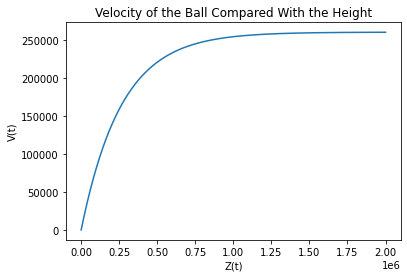

In [52]:
plt.plot(solutions['time_steps'],solutions['Vz_t'])
plt.title("Velocity of the Ball Compared With the Height")
plt.xlabel('Z(t)')
plt.ylabel('V(t)')
plt.plot()

What is the terminal velocity $V_T$ ? 

In [40]:
v_T=solutions['Vz_t'][-1]
print("V_T=",round(v_T),"m/s")

V_T= 260080 m/s


What is the coupling timescale $\tau$ (time necessary for the particle to reach 1/2 of $V_T$)

In [41]:
tau_i = 0
for i in range(len(solutions['Vz_t'])-1):
    if round(solutions['Vz_t'][i]) == round(v_T/2):#Here we put the condition for the tau to be less than v_T/2
        tau_i = i
        break
tau = round(solutions['time_steps'][tau_i])
print("tau=",tau,"s for V_z=",round(solutions['Vz_t'][tau_i]),"m/s")



tau= 183721 s for V_z= 130040 m/s


Now try to integrate the motion with dt=0.5 $\tau$  ? What happen ?

[]

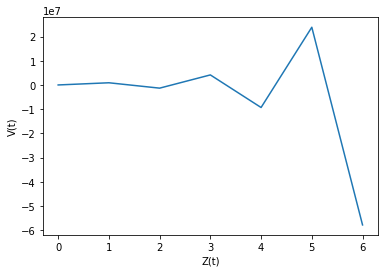

In [42]:
solutions_tau = euler_force(0.5*tau, [0,500000],0.0,0)
plt.plot(solutions_tau['time_steps'],solutions_tau['Vz_t'])
plt.xlabel('Z(t)')
plt.ylabel('V(t)')
plt.plot()
#Inflection point when V_z is max 
#Also we can see that the precision of our solution has been reduced

In order to cure that problem, we want to switch to an IMPLICIT EULER METHOD (1st order).
Write the Euler implicit numerical scheme  ($U_{n+1}=$ a function of $U_{n+1}$ and $U_n$)

$U_{n+1}= U_n + dtf(t_{n+1},U_{n+1})$

By solving analytically the above equation, derive an equation allowing to compute $U_{n+1}$ as a function of $U_n$

The system to solve:

$Z_{n+1}=Z_n + dtV_{n+1}$

$V_{n+1}=\frac{V_n -gdt}{\alpha}$

Where:

$\alpha={1-dt6\pi \mu r/m}$

In [43]:
#Write a code that solve implicitely the motion of the particle in the viscous fluid.
def implicit_euler_stokes(dt,interval_t,Vz_0,z_0):
    dt_points = np.arange(interval_t[0], interval_t[1]+dt,dt)
    z_t = [z_0]
    Vz_t = [Vz_0]
    alpha = 1-dt*6*np.pi*mu*r_1/m
    for x in range(1,len(dt_points)):
        Vz_t += [(Vz_t[-1]-9.81*dt)/alpha]
        z_t += [z_t[-1] + dt*Vz_t[-1]]
    return {'z_t':z_t,'Vz_t':Vz_t, 'time_steps':dt_points}



[]

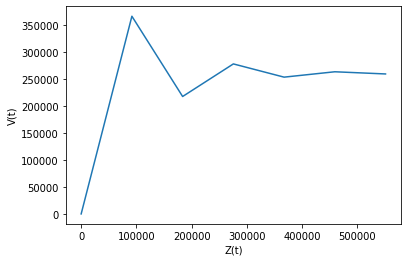

In [44]:
solutions_implicit = implicit_euler_stokes(0.5*tau, [0,500000],0.0,0)
plt.plot(solutions_implicit['time_steps'],solutions_implicit['Vz_t'])
plt.xlabel('Z(t)')
plt.ylabel('V(t)')
plt.plot()

Try different timesteps from 0.1$\tau$ to 2$\tau$ ? Does the integration breaks even for big timestep ?


[]

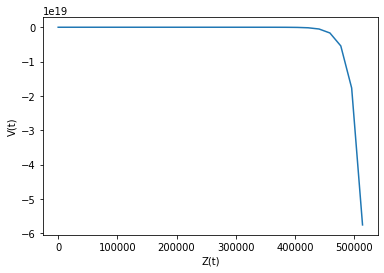

In [45]:
#0.1
solutions_implicit = implicit_euler_stokes(0.1*tau, [0,500000],0.0,0)
plt.plot(solutions_implicit['time_steps'],solutions_implicit['Vz_t'])
plt.xlabel('Z(t)')
plt.ylabel('V(t)')
plt.plot()


[]

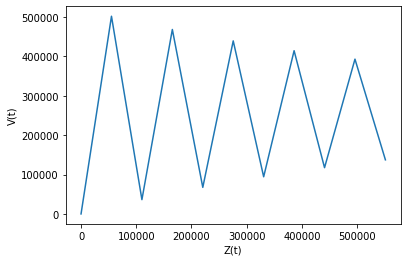

In [46]:
#0.3
solutions_implicit = implicit_euler_stokes(0.3*tau, [0,500000],0.0,0)
plt.plot(solutions_implicit['time_steps'],solutions_implicit['Vz_t'])
plt.xlabel('Z(t)')
plt.ylabel('V(t)')
plt.plot()

[]

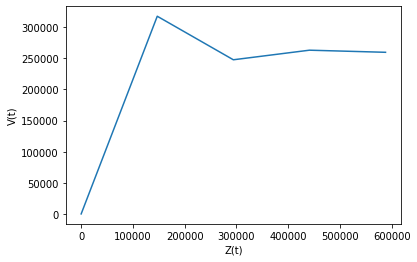

In [47]:
#0.8
solutions_implicit = implicit_euler_stokes(0.8*tau, [0,500000],0.0,0)
plt.plot(solutions_implicit['time_steps'],solutions_implicit['Vz_t'])
plt.xlabel('Z(t)')
plt.ylabel('V(t)')
plt.plot()

[]

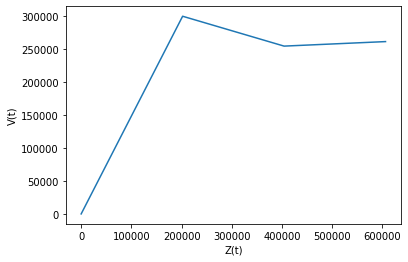

In [48]:
#1.1
solutions_implicit = implicit_euler_stokes(1.1*tau, [0,500000],0.0,0)
plt.plot(solutions_implicit['time_steps'],solutions_implicit['Vz_t'])
plt.xlabel('Z(t)')
plt.ylabel('V(t)')
plt.plot()

[]

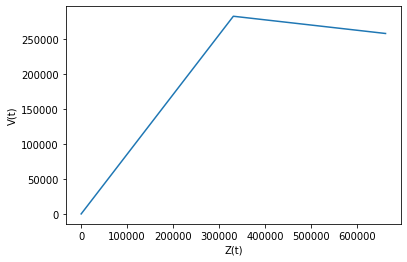

In [49]:
#1.8
solutions_implicit = implicit_euler_stokes(1.8*tau, [0,500000],0.0,0)
plt.plot(solutions_implicit['time_steps'],solutions_implicit['Vz_t'])
plt.xlabel('Z(t)')
plt.ylabel('V(t)')
plt.plot()

[]

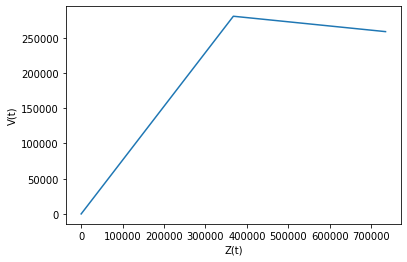

In [50]:
#2
solutions_implicit = implicit_euler_stokes(2*tau, [0,500000],0.0,0)
plt.plot(solutions_implicit['time_steps'],solutions_implicit['Vz_t'])
plt.xlabel('Z(t)')
plt.ylabel('V(t)')
plt.plot()

THIS IS THE MAGIC OF IMPLICIT SOLVERS !